In [1]:
import pandas as pd
import torch 
import matplotlib.pyplot as plt
from IPython.display import Audio

In [2]:
from tts.model.tacotron import Tacotron2
from tts.dataset.dataset import TTSDataset
from tts.component.tokenizer import Tokenizer
from tts.dataset.conversion import AudioMelConversions

from tts.model.config import Tacotron2Config

In [3]:
data = pd.read_csv("data/test.csv")


In [4]:
config = Tacotron2Config()
model = Tacotron2(config)
tokenizer = Tokenizer()
a2m = AudioMelConversions()

In [5]:
state_dict = torch.load("checkpoints/model_checkpoint.pt", map_location="cpu")
model.load_state_dict(state_dict['model_state_dict'])
model.eval()

Tacotron2(
  (encoder): Encoder(
    (embedding): Embedding(67, 512, padding_idx=0)
    (convolutions): ModuleList(
      (0-2): 3 x Sequential(
        (0): ConvNorm(
          (conv): Conv1d(512, 512, kernel_size=(5,), stride=(1,), padding=same)
        )
        (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
        (3): Dropout(p=0.5, inplace=False)
      )
    )
    (lstm): LSTM(512, 256, batch_first=True, bidirectional=True)
  )
  (decoder): Decoder(
    (prenet): Prenet(
      (layers): ModuleList(
        (0): Sequential(
          (0): LinearNorm(
            (linear): Linear(in_features=80, out_features=256, bias=False)
          )
          (1): ReLU()
        )
        (1): Sequential(
          (0): LinearNorm(
            (linear): Linear(in_features=256, out_features=256, bias=False)
          )
          (1): ReLU()
        )
      )
    )
    (rnn): ModuleList(
      (0): LSTMCell(768, 1024)
      (1): LSTMCell

In [6]:
def inference(text):
    print(f"Input Text: {text}")

    tokens = tokenizer.encode(text).unsqueeze(0)
    output, alignments  = model.inference(tokens)

    fig, axes = plt.subplots(2, 1, figsize=(5, 7))
    im0 = axes[0].imshow(output[0].T, aspect='auto', origin='lower', interpolation='none')
    axes[0].set_title("True Mel")
    fig.colorbar(im0, ax=axes[0])
    
    im1 = axes[1].imshow(alignments[0].T, aspect='auto', origin='lower', interpolation='none')
    axes[1].set_title("Predicted Mel")
    fig.colorbar(im1, ax=axes[1])

    plt.tight_layout()
    plt.show()
    
    audio = a2m.mel2audio(output[0].T, do_denorm=True)
    display(Audio(audio, rate=22050))

Input Text: He had been in the employ of a corn-chandler at Islington, and went into London with his master's cart and horse.


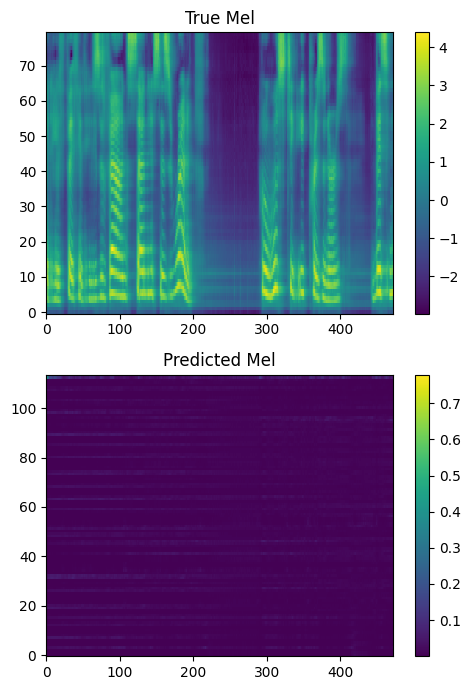

In [7]:
inference(data["normalized_text"][0])

Input Text: I can finally speak to you. There are so many things I would love to talk about! Do you have anything in mind?


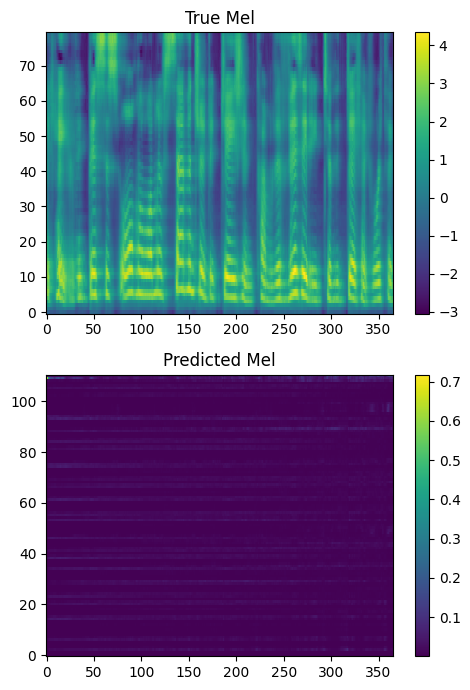

In [8]:
inference("I can finally speak to you. There are so many things I would love to talk about! Do you have anything in mind?")